# Dimension Reduction - PCA

## Read Parquet File 

In [ ]:
!pip install pyarrow

!pip install fastparquet



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import pyarrow
import fastparquet

In [ ]:
# Reading the Parquet file
test = "Final Dataset.gzip"  # Updated the path to the actual file
df_test = pd.read_parquet(test)  # Use read_parquet to read a Parquet file
print(df_test.head())


   time_accel  accel_x_max  accel_y_max  accel_z_max  accel_inclination_max  \
0    0.069037    -0.691924     7.451055     7.340922              46.477479   
1    0.119037    -0.948104     7.884406     7.132626              51.369980   
2    0.169037    -0.909797     7.872435     7.537246              48.013635   
3    0.219037    -0.502782     7.245153     7.455843              46.192832   
4    0.269037    -0.141258     6.749554     6.897995              49.132363   

   accel_zscore_x_max  accel_zscore_y_max  accel_zscore_z_max  \
0           -0.164574            1.164714            1.112203   
1           -0.749123            2.404749            0.636826   
2           -0.661714            2.370494            1.560258   
3            0.267009            0.575525            1.374479   
4            1.091934           -0.842637            0.101345   

   accel_zscore_inclination_max  accel_x_min  ...  gyro_zscore_z_sd  \
0                      0.230383    -1.058237  ...         23.10

## Convert Parquet File into CSV File 

In [ ]:
# Reading the Parquet file from your uploaded location
test = "Final Dataset.gzip"
df_test = pd.read_parquet(test)  # Use read_parquet to read the Parquet file

# Converting the DataFrame to a CSV file and saving it
csv_path = "Final_Dataset.csv"  # Specifying the path for the output CSV file
df_test.to_csv(csv_path)  # Saving the DataFrame to a CSV file

print("The file has been converted to CSV and saved as 'Final_Dataset.csv'.")


The file has been converted to CSV and saved as 'Final_Dataset.csv'.


In [ ]:
test = r"Final_Dataset.csv"
df_test = pd.read_csv(test)
df_test.head()

,Unnamed: 0,time_accel,accel_x_max,accel_y_max,accel_z_max,accel_inclination_max,accel_zscore_x_max,accel_zscore_y_max,accel_zscore_z_max,accel_zscore_inclination_max,...,gyro_zscore_z_sd,gyro_x_mean,gyro_y_mean,gyro_z_mean,gyro_zscore_x_mean,gyro_zscore_y_mean,gyro_zscore_z_mean,time_baro,baro_x,baro_zscore_x
0,0,0.069037,-0.691924,7.451055,7.340922,46.477479,-0.164574,1.164714,1.112203,0.230383,...,23.104804,0.678646,0.427504,-0.363618,6.489561,4.205574,-4.795187,0.225922,1017.197998,1.973483
1,1,0.119037,-0.948104,7.884406,7.132626,51.369980,-0.749123,2.404749,0.636826,1.905192,...,0.307244,0.111364,-0.032135,0.046197,1.063187,-0.312999,0.581509,0.275922,1017.197998,1.973483
2,2,0.169037,-0.909797,7.872435,7.537246,48.013635,-0.661714,2.370494,1.560258,0.756243,...,0.111652,0.158352,-0.148908,0.089324,1.512652,-1.460961,1.147330,0.325922,1017.203125,2.129327
3,3,0.219037,-0.502782,7.245153,7.455843,46.192832,0.267009,0.575525,1.374479,0.132942,...,0.231582,0.034966,0.120898,0.032969,0.332401,1.191425,0.407966,0.375922,1017.203125,2.129327
4,4,0.269037,-0.141258,6.749554,6.897995,49.132363,1.091934,-0.842637,0.101345,1.139207,...,0.234280,0.218363,0.052458,-0.008928,2.086695,0.518607,-0.141715,0.425922,1017.179443,1.409473


## Handle NaN Values

In [ ]:
import pandas as pd

# Load your dataset
dataset = pd.read_csv('Final_Dataset.csv')

# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Count the number of NaNs in each column
nan_counts = dataset.isna().sum()

# Print the counts of NaNs for each column without truncation
print(nan_counts)

# Calculate and print the percentage of NaNs in each column
nan_percentage = (dataset.isna().sum() / len(dataset)) * 100
print(nan_percentage)


Unnamed: 0                                    0
time_accel                                    0
accel_x_max                                   0
accel_y_max                                   0
accel_z_max                                   0
accel_inclination_max                         0
accel_zscore_x_max                            0
accel_zscore_y_max                            0
accel_zscore_z_max                            0
accel_zscore_inclination_max                  0
accel_x_min                                   0
accel_y_min                                   0
accel_z_min                                   0
accel_inclination_min                         0
accel_zscore_x_min                            0
accel_zscore_y_min                            0
accel_zscore_z_min                            0
accel_zscore_inclination_min                  0
accel_x_sd                                    0
accel_y_sd                                    0
accel_z_sd                              

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
dataset = pd.read_csv('Final_Dataset.csv')

# Separate the column you want to exclude
source_name_data = dataset['source_name']

# Drop the column 'source_name' from the dataset
dataset_dropped = dataset.drop(columns='source_name')

# Impute missing values using the mean for the remaining data
imputer = SimpleImputer(strategy='mean')  # Change to 'mean' or 'median' or 'most_frequent'
data_imputed = imputer.fit_transform(dataset_dropped)
dataset_imputed = pd.DataFrame(data_imputed, columns=dataset_dropped.columns)

# Add the excluded column back into the dataframe
dataset_imputed['source_name'] = source_name_data

# If you need the 'source_name' column to appear in its original position, you can use reindex:
original_columns = dataset.columns.tolist()  # Preserve the original order
dataset_imputed = dataset_imputed.reindex(columns=original_columns)

# Now you can work with `dataset_imputed` which has the 'source_name' excluded from imputation
# Save the imputed dataset to a new CSV file
dataset_imputed.to_csv('Imputed_Dataset.csv', index=False)

# Principle Component Analysis

## Number of Components with Eigenvalue > 1 + Top Contributing Variables per Component

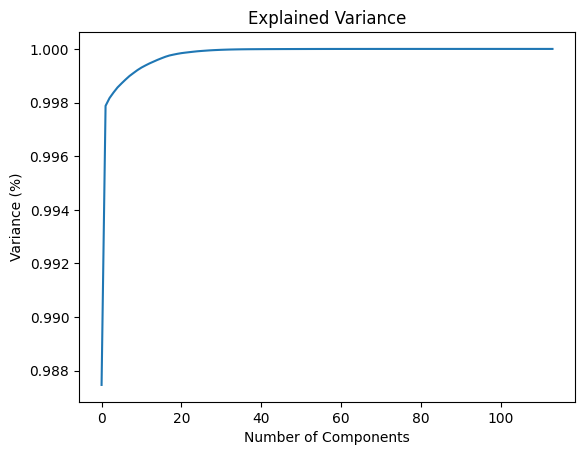

Number of components with eigenvalue > 1: 18
Top contributing variables per principal component:
Principal Component 1:
                         Weight  Absolute Weight
time_baro              0.500006         0.500006
time_accel             0.499989         0.499989
time_linaccel          0.499988         0.499988
time_mergedpost        0.499988         0.499988
accel_inclination_min  0.002916         0.002916

Principal Component 2:
                          Weight  Absolute Weight
accel_inclination_max  -0.572044         0.572044
accel_inclination_mean -0.566392         0.566392
accel_inclination_min  -0.560551         0.560551
accel_y_max            -0.072358         0.072358
accel_y_mean           -0.072081         0.072081

Principal Component 3:
                                 Weight  Absolute Weight
baro_x                        -0.748722         0.748722
accel_zscore_inclination_min   0.216690         0.216690
accel_zscore_y_min             0.210203         0.210203
accel_zsco

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
dataset = pd.read_csv('Imputed_Dataset.csv')

# Exclude non-numeric or identifier columns
cols_to_exclude = ['source_name', 'Unnamed: 0', 'index']
data_for_pca = dataset.drop(columns=cols_to_exclude)

# Fit the PCA
pca = PCA()
principal_components = pca.fit_transform(data_for_pca)
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

# Calculate the number of components with eigenvalue > 1
eigenvalues = pca.explained_variance_
n_components_kaiser = sum(eigenvalues > 1)
print(f"Number of components with eigenvalue > 1: {n_components_kaiser}")

# Print the most influential variables for each principal component
components = pca.components_
num_components = pca.n_components_
feature_names = data_for_pca.columns

print("Top contributing variables per principal component:")
for i, comp in enumerate(components):
    component_df = pd.DataFrame(comp, index=feature_names, columns=['Weight'])
    component_df['Absolute Weight'] = component_df['Weight'].abs()
    sorted_component = component_df.sort_values('Absolute Weight', ascending=False)
    top_features = sorted_component.head(5)  # change count if more or fewer top features are desired
    print(f"Principal Component {i+1}:")
    print(top_features)
    print()




## Analysis of Results

Principal Component 1: Time-related features (time_baro, time_accel, etc.) are dominating, which could be indicative of trends or patterns over time being significant in the dataset.

Principal Component 2 and beyond: Inclination and barometric data (accel_inclination_max, baro_x, etc.) have strong contributions, suggesting these features are critical in explaining the variance in your dataset.

Gyroscope and Accelerometer Data: These features frequently appear in higher principal components, indicating their importance in capturing motion-related aspects or other dynamics in your data.

Principal Component 1 with Top 5 Variables: 
time_baro
time_accel 
time_linaccel 
time_mergedpost  
accel_inclination_min  


Principal Component 2 with Top 5 Variables: 
accel_inclination_max
accel_inclination_mean
accel_inclination_min
accel_y_max
accel_y_mean  

## How many components are needed to reach a certain threshold percentage of explained variance?

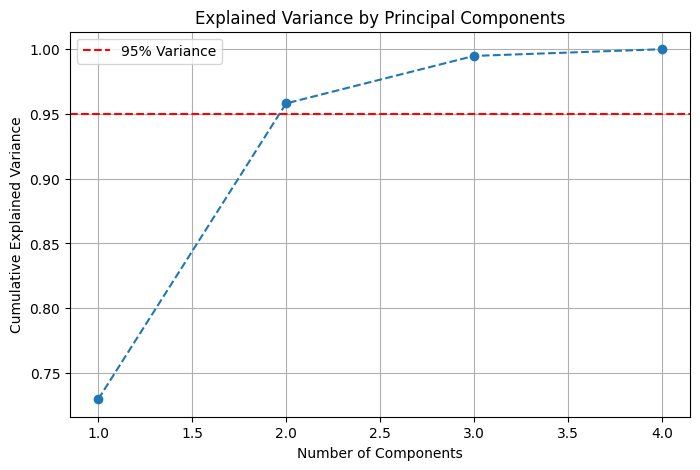

Number of components needed to explain at least 95% of the variance: 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load sample data
# Replace this with your dataset loading code
data = load_iris()
X = data.data

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute explained variance ratio and cumulative sum
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance') #Change threshold here
plt.legend()
plt.grid(True)
plt.show()

# Change percentange of variance to test different results
# Check how many components are needed to reach 95% variance
n_components_needed = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to explain at least 95% of the variance: {n_components_needed}")


## Components vs. Explained Variance 

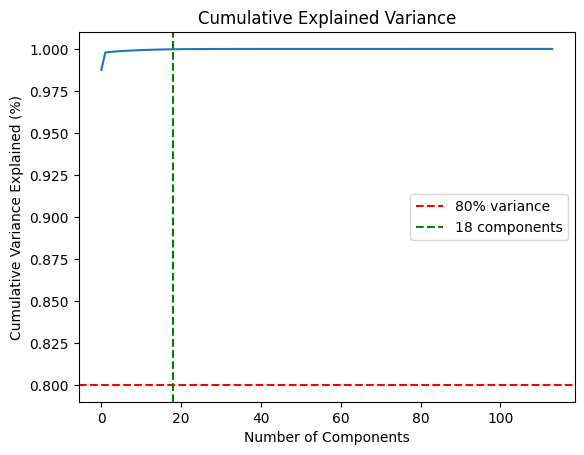

Cumulative explained variance with 18 components: 99.98%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Load the dataset
dataset = pd.read_csv('Imputed_Dataset.csv')

# Exclude non-numeric or identifier columns
cols_to_exclude = ['source_name', 'Unnamed: 0', 'index']
data_for_pca = dataset.drop(columns=cols_to_exclude)

# Fit the PCA
pca = PCA()
principal_components = pca.fit_transform(data_for_pca)
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)


#Change numbers of components & percentange of variance to test different results
# Plot the cumulative explained variance
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance')
plt.axvline(x=18, color='g', linestyle='--', label='18 components') #change number of components if needed
plt.legend()
plt.show()

# Print the cumulative explained variance for the first 18 components
explained_variance_18 = cumulative_explained_variance[17]  # Index 17 is the 18th component
print(f"Cumulative explained variance with 18 components: {explained_variance_18 * 100:.2f}%")

## Save PCA Results to CSV File 

In [ ]:
# Fit PCA with a specific number of components
n_components = 2
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data_for_pca)

# Save the reduced dataset
pd.DataFrame(reduced_data).to_csv('Reduced_Dataset.csv')

test = r"Reduced_Dataset.csv"
df_test = pd.read_csv(test)
df_test.head()

,Unnamed: 0,0,1
0,0,-295.837894,-14.661686
1,1,-295.645698,-20.220637
2,2,-295.573262,-15.122011
3,3,-295.502219,-10.819788
4,4,-295.390019,-14.028960


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
dataset = pd.read_csv('Imputed_Dataset.csv')

# Exclude non-numeric or identifier columns
cols_to_exclude = ['source_name', 'Unnamed: 0', 'index']
data_for_pca = dataset.drop(columns=cols_to_exclude)

# Fit the PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_for_pca)
explained_variance = pca.explained_variance_ratio_

# Reconstruct the dataset from the first two principal components
reconstructed_data = pca.inverse_transform(principal_components)

# Save the reconstructed dataset
reconstructed_df = pd.DataFrame(reconstructed_data, columns=feature_names)
reconstructed_df.to_csv('Reconstructed_Dataset.csv', index=False)


test = r"Reconstructed_Dataset.csv"
df_test = pd.read_csv(test)
df_test.head()


,time_accel,accel_x_max,accel_y_max,accel_z_max,accel_inclination_max,accel_zscore_x_max,accel_zscore_y_max,accel_zscore_z_max,accel_zscore_inclination_max,accel_x_min,...,gyro_zscore_z_sd,gyro_x_mean,gyro_y_mean,gyro_z_mean,gyro_zscore_x_mean,gyro_zscore_y_mean,gyro_zscore_z_mean,time_baro,baro_x,baro_zscore_x
0,0.157366,0.175159,7.105101,6.828866,46.899979,0.289696,0.326562,0.047975,0.342812,0.037377,...,0.209690,0.000189,0.000588,0.001042,-0.003159,0.006942,-0.005831,-0.223214,1015.383727,-0.314275
1,0.233578,0.203725,7.507411,6.478729,50.080468,0.301978,0.463080,-0.065936,0.483187,0.059346,...,0.214768,-0.000022,0.000829,0.001317,-0.003811,0.010178,-0.004425,-0.119778,1015.762377,-0.329143
2,0.288033,0.177493,7.138513,6.799800,47.164024,0.290609,0.337990,0.038416,0.354558,0.039174,...,0.210088,0.000171,0.000608,0.001065,-0.003211,0.007212,-0.005707,-0.090289,1015.415064,-0.315276
3,0.338942,0.155357,6.827241,7.070718,44.703154,0.281011,0.232444,0.126464,0.246025,0.022152,...,0.206138,0.000335,0.000421,0.000852,-0.002705,0.004709,-0.006788,-0.060446,1015.122001,-0.303565
4,0.383562,0.171848,7.059495,6.868584,46.539248,0.288101,0.311257,0.060702,0.327064,0.034834,...,0.209070,0.000213,0.000561,0.001011,-0.003082,0.006577,-0.005976,-0.000109,1015.340595,-0.312147


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5ea8f536-739f-4c50-806e-84490cb7d5e0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>